<h1 style="text-align:center">Advanced Statistical Inference</h1>
<h1 style="text-align:center">Clustering</h1>

## 1. Aims
<div class="alert alert-info"> 
To implement $k$-means and use it to cluster some data.
</div>

In [1]:
data_path = 'data/'

In [2]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
mat = scipy.io.loadmat(data_path + 'kmeansdata.mat')

In [3]:
X = mat['X']
print(X.shape)

(100, 2)


## 2. Implement the $k$-means algorithm covered in the lecture (not the kernelised version)

<div class="alert alert-info">

Hints:
<br>
<ul> 
<li> Your code needs to alternate between assigning points to the cluster that they’re closest to and recalculating the means by taking the average of these points.
<li> You may need to add something to your code to deal with the problem of no points being assigned to a particular cluster – set the mean randomly.
<li> You’ll find it easiest to maintain a variable that indicates which cluster each point is assigned to. Be careful not to assign a point to more than one cluster.
<li> Your algorithm should converge in fewer than 20 steps (or thereabouts). If it takes 100, something isn’t right!
</ul>

</div>

In [4]:
A = np.array([[5,5],[2,3]])
D = np.array([[1,2],[4,1]])
b = np.array([1,3])
c = np.array([2,5])

In [5]:
'''

DEFINE HELPER FUNCTIONS

'''

def initialize_means(k, dim):
    means = np.random.rand(k, dim)
    return means

def distance(centroids, x):
    """
    Eucledian distance
    """
    
    # check if x1 is a matrix
    axis = 0
    if len(centroids.shape)>1:
        axis = 1
        
    return np.sum(np.square(centroids-x), axis=axis)

def update_centroids(data, k, Zk):
    new_centroids = np.divide(Zk.dot(data),np.sum(Zk, axis=1)[:, None])
    return new_centroids

In [6]:
def kmeans(data, k=2, centroids=None):
    
    if centroids == None:
        centroids = initialize_means(k, data.shape[1])
    
    prev_Zk = None
    Zk = np.zeros((k, data.shape[0]))
    
    while not np.array_equal(prev_Zk, Zk):
        prev_Zk = Zk
        Zk = np.zeros((k, data.shape[0]))
        for i, x in enumerate(data):
            distances = distance(centroids, x)
            Zk[np.argmin(distances), i] = 1
        centroids = update_centroids(data, k, Zk)
    
    clusters = [np.array(data[zk == 1]) for zk in Zk]
    return clusters, centroids

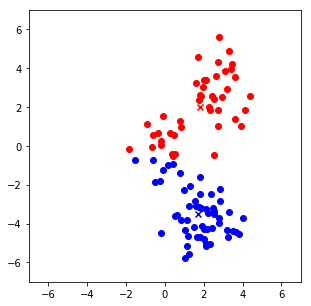

In [7]:
# plot results
clusters, centroids = kmeans(X, 2)
colors = ['r', 'b', 'k', 'g', 'y']

plt.figure(figsize=(5,5))

for cluster,centroid, color in zip(clusters, centroids, colors):
    plt.scatter(cluster[:,0], cluster[:,1], color=color)
    plt.scatter(centroid[0], centroid[1], marker='x', color=color)

plt.xlim(-7, 7)
plt.ylim(-7, 7)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

## 3. Run your algorithm for $k$ = 2, 3, 4 and 5. 

<div class="alert alert-info">
In each case, plot the data using a different symbol for each cluster.
</fiv>

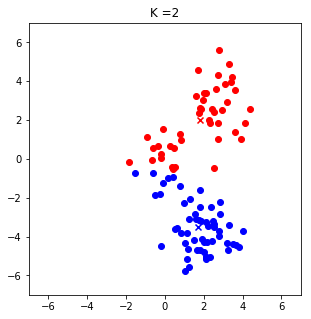

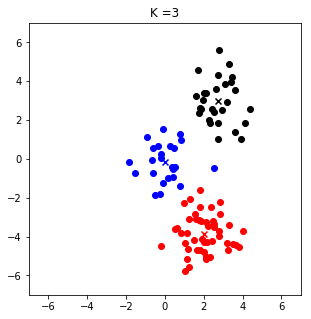

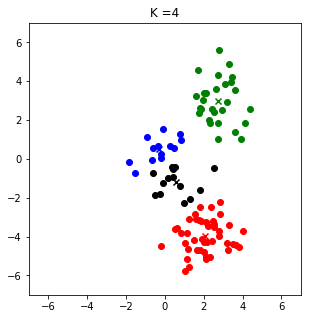

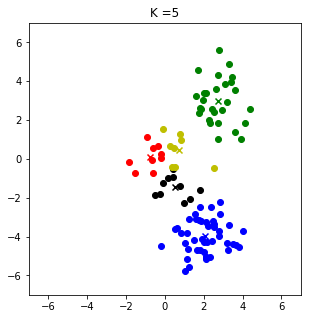

In [10]:
for k in range(2, 6):
    clusters, centroids = kmeans(X, k)
    colors = ['r', 'b', 'k', 'g', 'y']

    plt.figure(figsize=(5,5))

    for cluster, centroid, color in zip(clusters, centroids, colors):
        plt.scatter(cluster[:,0], cluster[:,1], color=color)
        plt.scatter(centroid[0], centroid[1], marker='x', color=color)
        
    plt.xlim(-7, 7)
    plt.ylim(-7, 7)
    plt.gca().set_aspect('equal', adjustable='box')

    plt.title('K =' + str(k))
    plt.show()